In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from statistics import mean
import math
import datetime
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.layers import Input, Add, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras import callbacks

In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 9.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

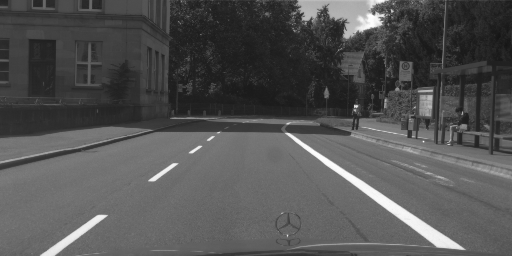

-1

In [ ]:
#image = cv2.imread("/content/zurich_000034_000019_leftImg8bit.png")
image = cv2.imread("/content/tubingen_000025_000019_leftImg8bit.png")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
cv2.waitKey(0)

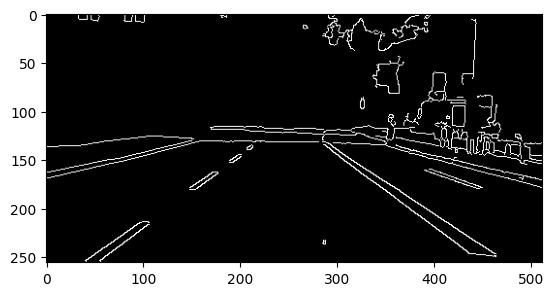

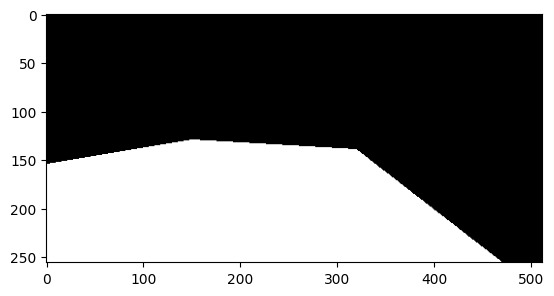

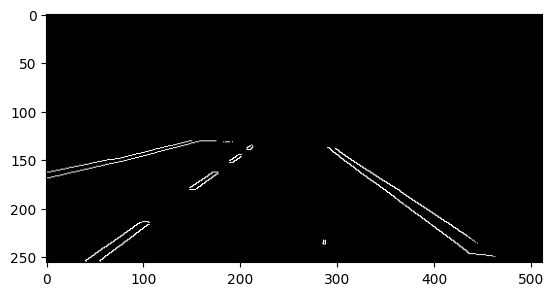

In [ ]:
def Canny_Edge(image):
  train = np.copy(image)
  gray = cv2.cvtColor(train,cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray,(5,5),0)
  canny = cv2.Canny(blur, 50, 150)
  return canny

def Required_Region(image):
  height= image.shape[0]
  polygon = np.array([[(0,155),(0,height),(470,height),(320,140),(150,130)]])
  mask= np.zeros_like(image)
  cv2.fillPoly(mask,polygon, 255)
  masked = cv2.bitwise_and(image,mask)
  return mask, masked

canny = Canny_Edge(image)
mask,roi = Required_Region(canny)
# train =np.copy(img)
# blur = cv2.GaussianBlur(gray,(5,5),0)
# cv2_imshow(blur)
# canny = cv2.Canny(blur, 50, 150)
#cv2_imshow(canny)
plt.imshow(canny, cmap='gray')
plt.show()
plt.imshow(mask, cmap='gray')
plt.show()
plt.imshow(roi, cmap='gray')
plt.show()

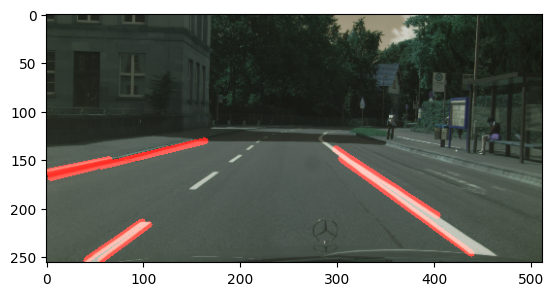

In [ ]:
lines = cv2.HoughLinesP(roi,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)

def display_lines(image,lines):
  line_image=np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2=line.reshape(4)
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
  return line_image

line_image = display_lines(image,lines)
# plt.imshow(line_image)
# plt.show()
combined_img=cv2.addWeighted(image,0.8,line_image,1,1)
plt.imshow(combined_img)
plt.show()

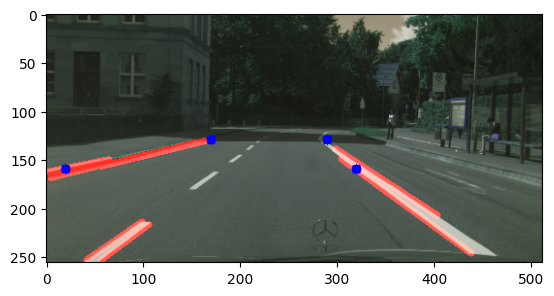

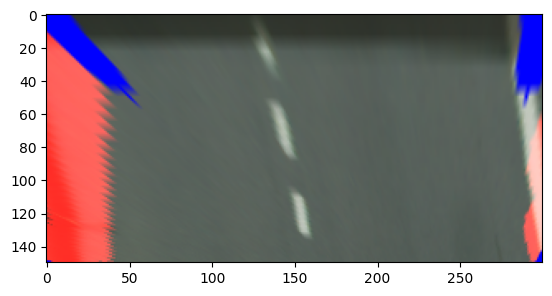

In [ ]:
#perspective transformation (Bird's Eye View)
tl = (170,130)
tr = (290,130)
bl = (20,160)
br = (320,160)
cv2.circle(combined_img,tl,5,(0,0,255),-1)
cv2.circle(combined_img,tr,5,(0,0,255),-1)
cv2.circle(combined_img,bl,5,(0,0,255),-1)
cv2.circle(combined_img,br,5,(0,0,255),-1)
pts = np.float32([tl,bl,br,tr])
pts_new = np.float32([(0,0),(0,150),(300,150),(300,0)])
matrix = cv2.getPerspectiveTransform(pts,pts_new)
transformed_img = cv2.warpPerspective(combined_img,matrix,(300,150))
plt.imshow(combined_img)
plt.show()
plt.imshow(transformed_img)
plt.show()

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from statistics import mean
import math



#Gamma Correction refers to using a Gamma Factor in order to upscale the pixels of a dim image or downscale the pixels of a bright image
# https://www.researchgate.net/publication/214781523_Understanding_the_Gamma_Adjustment_of_Images - source
# Output_Image= Input_Image^(Gamma_Value)
#When inversed we get:
# Gamma_Value = log(Output_Image)/log(Input_Image)


scale_low_img=low_img/255.0 #We scale the pixels of the dim image in the range of 0 to 1
scale_bright_img=bright_img/255.0 #We scale the pixels of the bright image in the range of 0 to 1
log_low_img=np.log(scale_low_img) #We apply log to each element of the scaled down dim image
log_bright_img=np.log(scale_bright_img) #We apply log to each element of the scaled down bright image

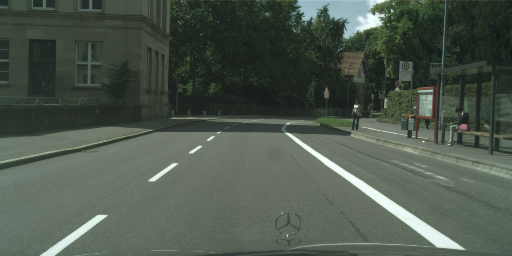

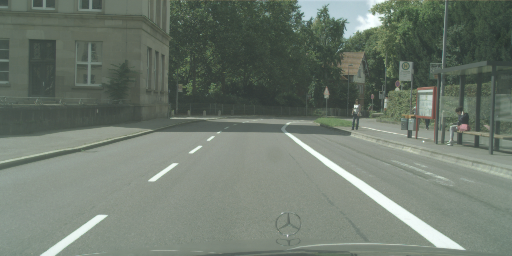

In [ ]:
original =cv2.imread('/content/original.png')
given = cv2.imread('/content/bright.png')
# normal_og= (original-127.5)/127.5
# normal_given= (given-127.5)/127.5
normal_og= original/255.0
normal_given= given/255.0
cv2_imshow(original)
cv2_imshow(given)
# cv2_imshow(normal_og)
# cv2_imshow(normal_given)

In [ ]:
log_og =np.log(normal_og)
log_given =np.log(normal_given)
g = log_given/log_og
g=g[0][0][0]

  g = log_given/log_og



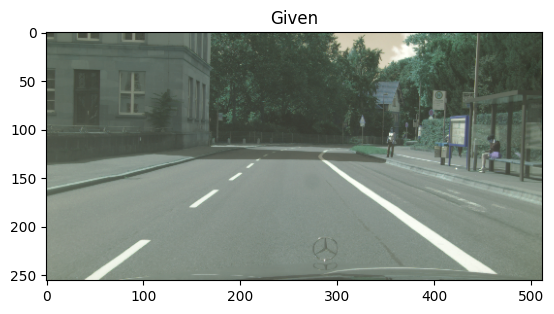

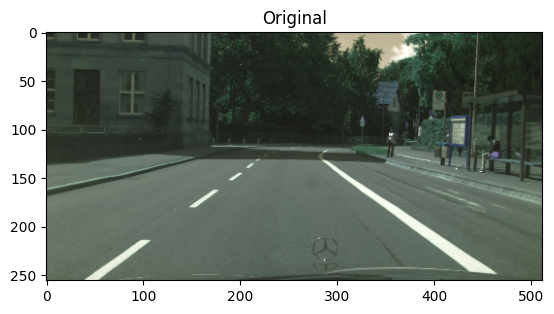

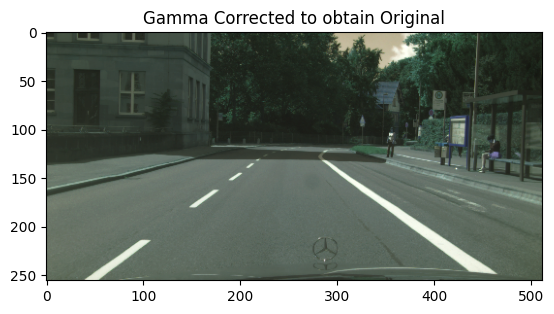

In [ ]:
def gamma_correction(image, gamma):
  inv_g = 1.0/gamma
  table = [((i / 255) ** inv_g) * 255 for i in range(256)] #Using a LookUp Table where each element lies in range [0,255] and applying the gamma uncorrection formula
  table = np.array(table, np.uint8)
  #table = np.array([((i/255.0)**inv_g)*255.0 for i in range(0,256)])
  g_img = cv2.LUT(image.astype(np.uint8),table)
  return g_img

gamma_corrected = gamma_correction(given,g)
plt.imshow(given)
plt.title('Given')
plt.show()
plt.imshow(original)
plt.title('Original')
plt.show()
plt.imshow(gamma_corrected)
plt.title('Gamma Corrected to obtain Original')
plt.show()